# Part I - (Ford GoBike System Data Exploration)
## by (OLADEJO OLANREWAJU OLAWALE)

## Introduction
>  This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.



## Preliminary Wrangling


In [105]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [106]:
#Loading dataset
gobike = pd.read_csv('201902-fordgobike-tripdata.csv')
gobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [107]:
#Getting information about the whole dataseet
gobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [108]:
#checking the total rows and columns
gobike.shape

(183412, 16)

In [109]:
#checking for empty values
gobike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [110]:
#checking for duplication in the dataset
gobike.duplicated().sum()

0

### What is the structure of your dataset?

> There is a total of 183412 records in the dataset with 16 features (duration_sec, end_time, start_station_id start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip) .The qualitative data include user_type, member_gender, bike_share_for_all_trip. 

### What is/are the main feature(s) of interest in your dataset?

> My main feature of interest is duration of trip i.e time taken for a trip.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

1.  Start time
3.  User type
4.  Bike share 
5.  Member gender
6.  Member birth year

I observed that the data is not clean an tidy so i decided to do some prelimineray wrangling, to clean and tidy the data by correcting datatypes and extracting data from columns for easy visiualization.

In [111]:

# Converting start_station_id, end_station_id, and bike_id to  string datatype
gobike['start_station_id'] = gobike['start_station_id'].astype('str')
gobike['end_station_id'] = gobike['end_station_id'].astype('str')
gobike['bike_id'] = gobike['bike_id'].astype('str')

#check datatype
print(gobike['start_station_id'].dtypes)
print(gobike['end_station_id'].dtypes)
print(gobike['bike_id'].dtypes)

object
object
object


In [112]:
#converting user tyoe and memebr gender to categorical 
gobike['user_type'] = gobike['user_type'].astype('category')
gobike['member_gender'] = gobike['member_gender'].astype('category')

#check datatype
print(gobike['user_type'].dtypes)
print(gobike['member_gender'].dtypes)

category
category


In [113]:
#Converting bike_share_for_all_trip to boolean datatype
gobike.bike_share_for_all_trip = (gobike.bike_share_for_all_trip == 'Yes')


In [114]:
# Convert data types to the right data type
# Converting start_time and end_time to datetime datatype
gobike['start_time'] = pd.to_datetime(gobike['start_time'])
gobike['end_time'] = pd.to_datetime(gobike['end_time'])

#check datatype
print(gobike['start_time'].dtypes)
print(gobike['end_time'].dtypes)

datetime64[ns]
datetime64[ns]


In [115]:
#Extracting the date from start_time variable
gobike['start_date'] = gobike['start_time'].dt.strftime('%Y-%m-%d')
#checking column
gobike['start_date']

0         2019-02-28
1         2019-02-28
2         2019-02-28
3         2019-02-28
4         2019-02-28
5         2019-02-28
6         2019-02-28
7         2019-02-28
8         2019-02-28
9         2019-02-28
10        2019-02-28
11        2019-02-28
12        2019-02-28
13        2019-02-28
14        2019-02-28
15        2019-02-28
16        2019-02-28
17        2019-02-28
18        2019-02-28
19        2019-02-28
20        2019-02-28
21        2019-02-28
22        2019-02-28
23        2019-02-28
24        2019-02-28
25        2019-02-28
26        2019-02-28
27        2019-02-28
28        2019-02-28
29        2019-02-28
             ...    
183382    2019-02-01
183383    2019-02-01
183384    2019-02-01
183385    2019-02-01
183386    2019-02-01
183387    2019-02-01
183388    2019-02-01
183389    2019-02-01
183390    2019-02-01
183391    2019-02-01
183392    2019-02-01
183393    2019-02-01
183394    2019-02-01
183395    2019-02-01
183396    2019-02-01
183397    2019-02-01
183398    201

In [116]:
#Extracting the month from start_time variable
gobike['start_month'] = gobike['start_time'].dt.strftime('%B')
#checking column
gobike['start_month']

0         February
1         February
2         February
3         February
4         February
5         February
6         February
7         February
8         February
9         February
10        February
11        February
12        February
13        February
14        February
15        February
16        February
17        February
18        February
19        February
20        February
21        February
22        February
23        February
24        February
25        February
26        February
27        February
28        February
29        February
            ...   
183382    February
183383    February
183384    February
183385    February
183386    February
183387    February
183388    February
183389    February
183390    February
183391    February
183392    February
183393    February
183394    February
183395    February
183396    February
183397    February
183398    February
183399    February
183400    February
183401    February
183402    February
183403    Fe

In [117]:
#Extracting the week day from start_time variable
gobike['start_day_of_week'] = gobike['start_time'].dt.strftime('%A')
#checking column
gobike['start_day_of_week']

0         Thursday
1         Thursday
2         Thursday
3         Thursday
4         Thursday
5         Thursday
6         Thursday
7         Thursday
8         Thursday
9         Thursday
10        Thursday
11        Thursday
12        Thursday
13        Thursday
14        Thursday
15        Thursday
16        Thursday
17        Thursday
18        Thursday
19        Thursday
20        Thursday
21        Thursday
22        Thursday
23        Thursday
24        Thursday
25        Thursday
26        Thursday
27        Thursday
28        Thursday
29        Thursday
            ...   
183382      Friday
183383      Friday
183384      Friday
183385      Friday
183386      Friday
183387      Friday
183388      Friday
183389      Friday
183390      Friday
183391      Friday
183392      Friday
183393      Friday
183394      Friday
183395      Friday
183396      Friday
183397      Friday
183398      Friday
183399      Friday
183400      Friday
183401      Friday
183402      Friday
183403      

In [118]:
#Extracting the hour of the day from start_time variable
gobike['start_hour_of_trip'] = gobike['start_time'].dt.strftime('%H')
#checking column
gobike['start_hour_of_trip']

0         17
1         18
2         12
3         17
4         23
5         23
6         23
7         23
8         23
9         23
10        23
11        23
12        23
13        23
14        23
15        23
16        23
17        23
18        23
19        23
20        23
21        23
22        23
23        23
24        23
25        23
26        23
27        23
28        23
29        23
          ..
183382    00
183383    00
183384    00
183385    00
183386    00
183387    00
183388    00
183389    00
183390    00
183391    00
183392    00
183393    00
183394    00
183395    00
183396    00
183397    00
183398    00
183399    00
183400    00
183401    00
183402    00
183403    00
183404    00
183405    00
183406    00
183407    00
183408    00
183409    00
183410    00
183411    00
Name: start_hour_of_trip, Length: 183412, dtype: object

In [119]:
#Extracting the date from end_time variable
gobike['end_date'] = gobike['end_time'].dt.strftime('%Y-%m-%d')
#checking column
gobike['end_date']

0         2019-03-01
1         2019-03-01
2         2019-03-01
3         2019-03-01
4         2019-03-01
5         2019-03-01
6         2019-03-01
7         2019-03-01
8         2019-03-01
9         2019-03-01
10        2019-03-01
11        2019-03-01
12        2019-03-01
13        2019-03-01
14        2019-03-01
15        2019-03-01
16        2019-02-28
17        2019-02-28
18        2019-02-28
19        2019-02-28
20        2019-02-28
21        2019-02-28
22        2019-02-28
23        2019-02-28
24        2019-02-28
25        2019-02-28
26        2019-02-28
27        2019-02-28
28        2019-02-28
29        2019-02-28
             ...    
183382    2019-02-01
183383    2019-02-01
183384    2019-02-01
183385    2019-02-01
183386    2019-02-01
183387    2019-02-01
183388    2019-02-01
183389    2019-02-01
183390    2019-02-01
183391    2019-02-01
183392    2019-02-01
183393    2019-02-01
183394    2019-02-01
183395    2019-02-01
183396    2019-02-01
183397    2019-02-01
183398    201

In [120]:
#Extracting the month from end_time variable
gobike['end_month'] = gobike['end_time'].dt.strftime('%B')
#checking column
gobike['end_month']

0            March
1            March
2            March
3            March
4            March
5            March
6            March
7            March
8            March
9            March
10           March
11           March
12           March
13           March
14           March
15           March
16        February
17        February
18        February
19        February
20        February
21        February
22        February
23        February
24        February
25        February
26        February
27        February
28        February
29        February
            ...   
183382    February
183383    February
183384    February
183385    February
183386    February
183387    February
183388    February
183389    February
183390    February
183391    February
183392    February
183393    February
183394    February
183395    February
183396    February
183397    February
183398    February
183399    February
183400    February
183401    February
183402    February
183403    Fe

In [121]:
#Extracting the weekday from end_time variable
gobike['end_day_of_week'] = gobike['end_time'].dt.strftime('%A')
#checking column
gobike['end_day_of_week']

0           Friday
1           Friday
2           Friday
3           Friday
4           Friday
5           Friday
6           Friday
7           Friday
8           Friday
9           Friday
10          Friday
11          Friday
12          Friday
13          Friday
14          Friday
15          Friday
16        Thursday
17        Thursday
18        Thursday
19        Thursday
20        Thursday
21        Thursday
22        Thursday
23        Thursday
24        Thursday
25        Thursday
26        Thursday
27        Thursday
28        Thursday
29        Thursday
            ...   
183382      Friday
183383      Friday
183384      Friday
183385      Friday
183386      Friday
183387      Friday
183388      Friday
183389      Friday
183390      Friday
183391      Friday
183392      Friday
183393      Friday
183394      Friday
183395      Friday
183396      Friday
183397      Friday
183398      Friday
183399      Friday
183400      Friday
183401      Friday
183402      Friday
183403      

In [122]:
#Extracting the end hour from end_time variable
gobike['end_hour_of_trip'] = gobike['end_time'].dt.strftime('%H')
#checking column
gobike['end_hour_of_trip']

0         08
1         06
2         05
3         04
4         00
5         00
6         00
7         00
8         00
9         00
10        00
11        00
12        00
13        00
14        00
15        00
16        23
17        23
18        23
19        23
20        23
21        23
22        23
23        23
24        23
25        23
26        23
27        23
28        23
29        23
          ..
183382    00
183383    00
183384    00
183385    00
183386    00
183387    00
183388    00
183389    00
183390    00
183391    00
183392    00
183393    00
183394    00
183395    00
183396    00
183397    00
183398    00
183399    00
183400    00
183401    00
183402    00
183403    00
183404    00
183405    00
183406    00
183407    00
183408    00
183409    00
183410    00
183411    00
Name: end_hour_of_trip, Length: 183412, dtype: object

In [123]:
#Creating a feature for members age as at 2019  from memeber birth year
gobike['member_age'] = 2019 - gobike['member_birth_year']
#checking column
gobike['member_age']

0         35.0
1          NaN
2         47.0
3         30.0
4         45.0
5         60.0
6         36.0
7         30.0
8         31.0
9         27.0
10        23.0
11        26.0
12        29.0
13         NaN
14        31.0
15        26.0
16        38.0
17        44.0
18        29.0
19        41.0
20        36.0
21        35.0
22        28.0
23        22.0
24        44.0
25        33.0
26        19.0
27        37.0
28         NaN
29        24.0
          ... 
183382    31.0
183383    22.0
183384    28.0
183385    74.0
183386    21.0
183387    20.0
183388    92.0
183389    34.0
183390    20.0
183391    39.0
183392    26.0
183393    34.0
183394    44.0
183395    26.0
183396    28.0
183397    31.0
183398    37.0
183399    26.0
183400    35.0
183401    28.0
183402     NaN
183403    19.0
183404    39.0
183405    35.0
183406    31.0
183407    23.0
183408    35.0
183409    29.0
183410    31.0
183411    30.0
Name: member_age, Length: 183412, dtype: float64

In [124]:
#converting the duration from sec to min and creating a feature
gobike['duration_min'] = gobike['duration_sec']/60
#checking column
gobike['duration_min']

0          869.750000
1          708.683333
2         1030.900000
3          608.166667
4           26.416667
5           29.883333
6           19.116667
7           26.916667
8           26.166667
9           17.483333
10           7.633333
11           8.433333
12          19.600000
13          15.250000
14           6.583333
15           3.466667
16           9.133333
17          11.233333
18           9.283333
19          14.566667
20           6.950000
21           6.900000
22          12.383333
23           6.116667
24           4.200000
25           6.000000
26           6.416667
27           6.800000
28          10.833333
29          10.483333
             ...     
183382      16.016667
183383       7.233333
183384       3.066667
183385       6.666667
183386       7.083333
183387       9.966667
183388       8.166667
183389       3.066667
183390       3.866667
183391       4.483333
183392      21.483333
183393       2.583333
183394      12.000000
183395       1.583333
183396    

In [125]:
#Checking if the channges and columns created has been saved
gobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 26 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183412 non-null object
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183412 non-null object
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null object
user_type                  183412 non-null category
member_birth_year          175147 non-null float64
member_gender              175147 non-null category
bike_share_for_all_trip    183412 non-null bool
start_date                 183412 non-null object
start_month      

In [126]:
#counting the member genders values
gobike['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [127]:
# Dropping missing records 

gobike.dropna(inplace=True)

In [128]:
#checking if we still have missing values
gobike.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
start_date                 0
start_month                0
start_day_of_week          0
start_hour_of_trip         0
end_date                   0
end_month                  0
end_day_of_week            0
end_hour_of_trip           0
member_age                 0
duration_min               0
dtype: int64

In [129]:
#checking the new number of columns and records in the data 
gobike.shape

(174952, 26)

In [130]:
#visualy acessing the data randomly
gobike.sample(15)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,start_date,start_month,start_day_of_week,start_hour_of_trip,end_date,end_month,end_day_of_week,end_hour_of_trip,member_age,duration_min
74535,295,2019-02-19 10:13:14.836,2019-02-19 10:18:10.707,304.0,Jackson St at 5th St,37.348759,-121.894798,280.0,San Fernando St at 7th St,37.337122,...,2019-02-19,February,Tuesday,10,2019-02-19,February,Tuesday,10,27.0,4.916667
83514,770,2019-02-17 22:44:29.010,2019-02-17 22:57:19.250,92.0,Mission Bay Kids Park,37.772301,-122.393028,34.0,Father Alfred E Boeddeker Park,37.783988,...,2019-02-17,February,Sunday,22,2019-02-17,February,Sunday,22,48.0,12.833333
142769,66,2019-02-07 16:52:21.006,2019-02-07 16:53:27.486,158.0,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,209.0,45th St at MLK Jr Way,37.833558,...,2019-02-07,February,Thursday,16,2019-02-07,February,Thursday,16,37.0,1.100000
137656,255,2019-02-08 08:32:20.488,2019-02-08 08:36:36.129,59.0,S Van Ness Ave at Market St,37.774814,-122.418954,77.0,11th St at Natoma St,37.773507,...,2019-02-08,February,Friday,08,2019-02-08,February,Friday,08,25.0,4.250000
97887,865,2019-02-15 08:23:18.314,2019-02-15 08:37:43.911,119.0,18th St at Noe St,37.761047,-122.432642,90.0,Townsend St at 7th St,37.771058,...,2019-02-15,February,Friday,08,2019-02-15,February,Friday,08,28.0,14.416667
163092,435,2019-02-05 09:40:11.894,2019-02-05 09:47:27.099,80.0,Townsend St at 5th St,37.775235,-122.397437,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,2019-02-05,February,Tuesday,09,2019-02-05,February,Tuesday,09,52.0,7.250000
38206,252,2019-02-23 12:32:22.610,2019-02-23 12:36:35.151,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,25.0,Howard St at 2nd St,37.787522,...,2019-02-23,February,Saturday,12,2019-02-23,February,Saturday,12,28.0,4.200000
32375,668,2019-02-24 14:31:10.994,2019-02-24 14:42:19.146,368.0,Myrtle St at Polk St,37.785434,-122.419622,56.0,Koshland Park,37.773414,...,2019-02-24,February,Sunday,14,2019-02-24,February,Sunday,14,35.0,11.133333
15679,798,2019-02-27 09:06:14.514,2019-02-27 09:19:32.708,118.0,Eureka Valley Recreation Center,37.759177,-122.436943,88.0,11th St at Bryant St,37.770030,...,2019-02-27,February,Wednesday,09,2019-02-27,February,Wednesday,09,31.0,13.300000
98188,416,2019-02-15 08:09:27.676,2019-02-15 08:16:24.000,241.0,Ashby BART Station,37.852477,-122.270213,270.0,Ninth St at Heinz Ave,37.853489,...,2019-02-15,February,Friday,08,2019-02-15,February,Friday,08,32.0,6.933333


In [131]:
#checking out the summary stattistics
gobike.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,member_age,duration_min
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,37.771220,-122.351760,37.771414,-122.351335,1984.803135,34.196865,11.733379
std,1642.204905,0.100391,0.117732,0.100295,0.117294,10.118731,10.118731,27.370082
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1878.000000,18.000000,1.016667
25%,323.000000,37.770407,-122.411901,37.770407,-122.411647,1980.000000,27.000000,5.383333
50%,510.000000,37.780760,-122.398279,37.781010,-122.397437,1987.000000,32.000000,8.500000
75%,789.000000,37.797320,-122.283093,37.797673,-122.286533,1992.000000,39.000000,13.150000
max,84548.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000,141.000000,1409.133333


In [132]:
#saving the cleaned dataset
gobike.to_csv('gobike_clean.csv', index=False)

## Univariate Exploration

I will start by looking at the distribution of the main variable of interest: duration of trip (duration_sec)



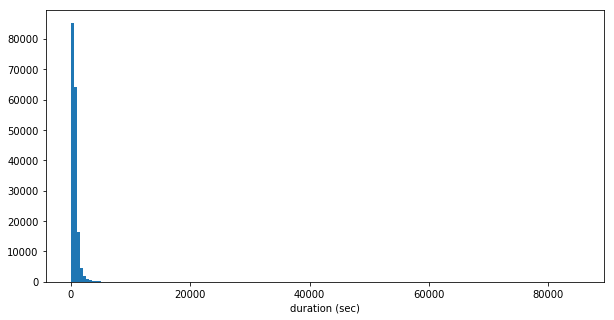

In [133]:
# Plotting an histogram for the duration in seconds
binsize = 500
bins = np.arange(0, gobike['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = gobike, x = 'duration_sec', bins = bins)
plt.xlabel('duration (sec)')
plt.show()

From the plot the distribution of the time taken for the trips is not clear, so plotting it out in minute

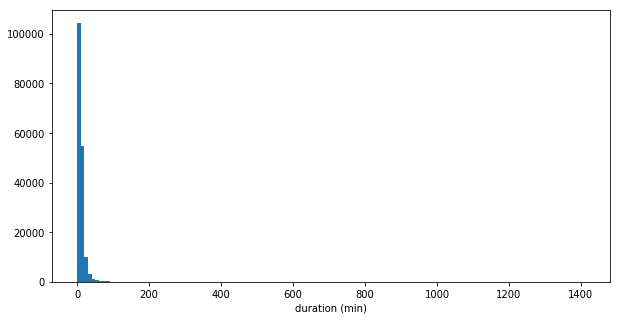

In [134]:
# Plotting an histogram for the duration in minutes
binsize = 10

bins = np.arange(0, gobike['duration_min'].max()+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = gobike, x = 'duration_min', bins = bins)
plt.xlabel('duration (min)')
plt.show()

From the plot it can be noticed that most of the bike rides didn’t take much time and most was within 200 minute of trip duration. So looking deeper into the data by looking into rides less than 60 minutes

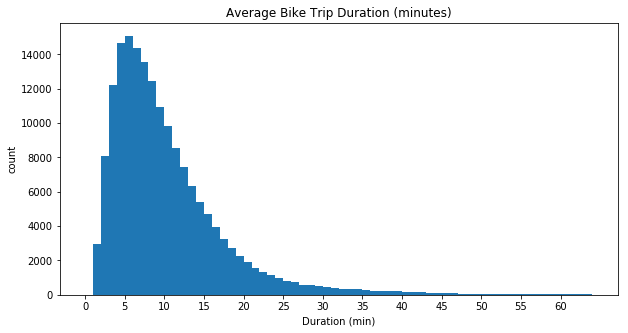

In [135]:
# Plotting an histogram for the duration in minutes and reducing the plot limit to zoom in the data
# accessing average rides below 60mins

bins = np.arange(0, 65, 1)
ticks = np.arange(0, 65, 5)
plt.figure(figsize=[10, 5])
plt.hist(data=gobike, x='duration_min', bins=bins);
plt.title('Average Bike Trip Duration (minutes)')
plt.xticks(ticks, ticks);
plt.xlabel('Duration (min)')
plt.ylabel('count')
plt.show()

Zooming in on the plot to have a closer look at the area where most cases lie to get an idea of what the distribution is like by removing outliers exceeding 60 minutes trip duration and it indicated that most trips lasted between 5 and 13 minutes.

.

### Looking at the first categorical variable gender

In [136]:
#getting the value counts of gender
gobike['member_gender'].value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

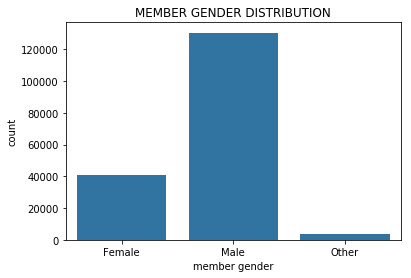

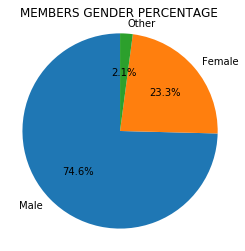

In [137]:
#plotting a bar chart of members gender
base_color = sb.color_palette()[0]
sb.countplot(data=gobike,x='member_gender',color=base_color)
plt.xlabel('member gender')
plt.title('MEMBER GENDER DISTRIBUTION')
plt.show()

#plotting a pie chart of members gender to display Percentage 
sorted_counts = gobike['member_gender'].value_counts()
plt.pie(sorted_counts, labels=sorted_counts.index, startangle=90, autopct='%1.1f%%')
plt.axis('square')
plt.title('MEMBERS GENDER PERCENTAGE')
plt.show()

Male users made the most bike trips and with a percentage of 74.6% of the total bike trips made, and the female users with 23.3% followed by the others with 2.1%.

### Now to examine the type of users 

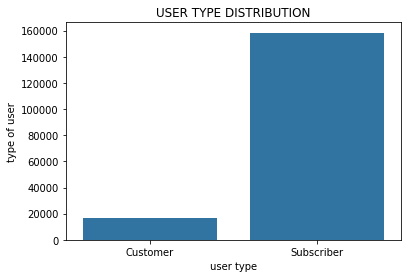

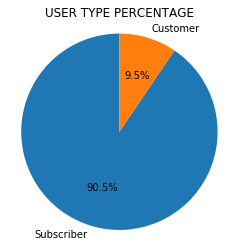

In [138]:
#plotting a bar chart of user type
base_color = sb.color_palette()[0]
sb.countplot(data=gobike,x='user_type',color=base_color)
plt.xlabel('user type')
plt.ylabel('type of user')
plt.title('USER TYPE DISTRIBUTION')
plt.show()

#plotting a pie chart for user type to display Percentage 
sorted_counts = gobike['user_type'].value_counts()
plt.pie(sorted_counts, labels=sorted_counts.index, startangle=90, autopct='%1.1f%%')
plt.axis('square')
plt.title('USER TYPE PERCENTAGE')
plt.show()

It can be seen from both plots that majoprity of the users are subscribers consisting of 90.5% of the total users in the dataset

Now looking at the number of people who share there rides i.e bike share for all trip 

.

#### Examine the bike share variable.

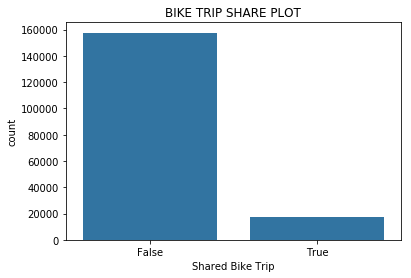

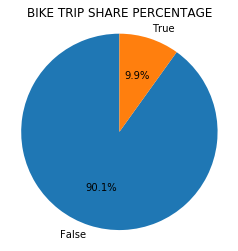

In [139]:
#plotting a bar chart of bike shared trip
base_color = sb.color_palette()[0]
sb.countplot(data=gobike,x='bike_share_for_all_trip',color=base_color)
plt.xlabel('Shared Bike Trip')
plt.ylabel('count')
plt.title('BIKE TRIP SHARE PLOT')
plt.show()

#plotting a pie chart of shared trips to display Percentage 
sorted_counts = gobike['bike_share_for_all_trip'].value_counts()
plt.pie(sorted_counts, labels=sorted_counts.index, startangle=90, autopct='%1.1f%%')
plt.axis('square')
plt.title('BIKE TRIP SHARE PERCENTAGE')
plt.show()

Very few number of riders shared their bike trips with others and they consist of 9.9% of the total riders 

### Looking at the day of the week to know when trips were taken mostly

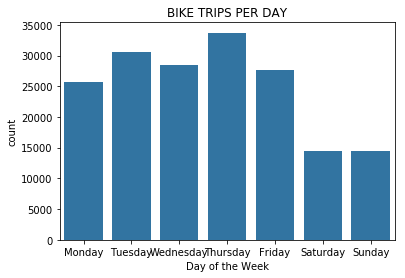

Thursday     33712
Tuesday      30584
Wednesday    28426
Friday       27663
Monday       25641
Sunday       14512
Saturday     14414
Name: start_day_of_week, dtype: int64


In [140]:
#plotting a bar chart of trips taken oer day
days_of_the_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
days_of_the_week_categorization = pd.api.types.CategoricalDtype(ordered=True, categories=days_of_the_week)
gobike['start_day_of_week'] = gobike['start_day_of_week'].astype(days_of_the_week_categorization)

base_color = sb.color_palette()[0]

sb.countplot(data=gobike,x='start_day_of_week',color=base_color)
plt.xlabel('Day of the Week')
plt.ylabel('count')
plt.title('BIKE TRIPS PER DAY')
plt.show()
print(gobike['start_day_of_week'].value_counts())

Most of the bike trips were taken during the weekdays indicating that the bikes were mostly likely used for commuting with most of the trip happening on the Thursday weekday.

### To know what hour of the day when most of the trips were started

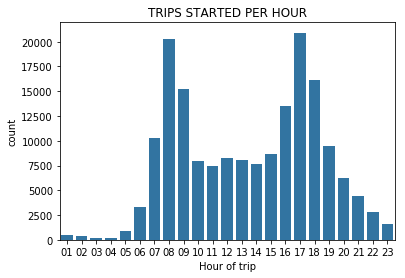

17    20904
08    20227
18    16118
09    15204
16    13473
07    10231
19     9424
15     8646
12     8220
13     8098
10     7970
14     7677
11     7461
20     6211
21     4400
06     3293
22     2793
23     1572
05      866
01      525
02      355
04      227
03      164
Name: start_hour_of_trip, dtype: int64


In [141]:
#plotting a bar chart 
hour_of_the_day = ['01', '02', '03','04', '05', '06','07', '08', '09', '10', '11', '12','13', '14', '15','16', '17', '18', '19','20', '21', '22','23']
hour_of_the_day_categorization = pd.api.types.CategoricalDtype(ordered=True, categories=hour_of_the_day)
gobike['start_hour_of_trip'] = gobike['start_hour_of_trip'].astype(hour_of_the_day_categorization)

base_color = sb.color_palette()[0]

sb.countplot(data=gobike,x='start_hour_of_trip',color=base_color)
plt.xlabel('Hour of trip')
plt.ylabel('count')
plt.title('TRIPS STARTED PER HOUR')
plt.show()
print(gobike['start_hour_of_trip'].value_counts())

From the distribution most of the trip were started at the hour 8hr, 9hr, 17hr and 18hr which are times people leave for work (8hr and 9hr) and head back home from work(17hr and 18hr) indicating that the likely primary usage is for commuting.

### Now looking at the age distribution of riders

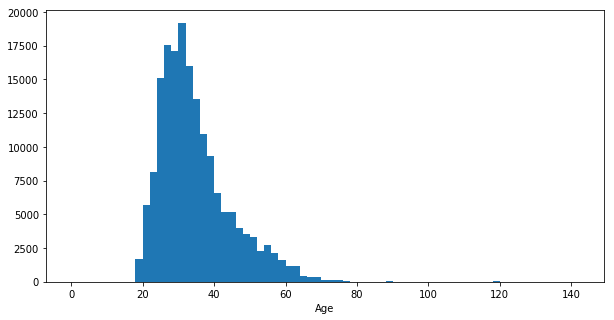

In [142]:
#Histogram showing the distribution of ages of riders
binsize = 2
bins = np.arange(0, gobike['member_age'].max()+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = gobike, x = 'member_age', bins = bins)
plt.xlabel('Age')
plt.show()

The age distribution indicates that most of the bike users lie between 20 to 40 years of age.

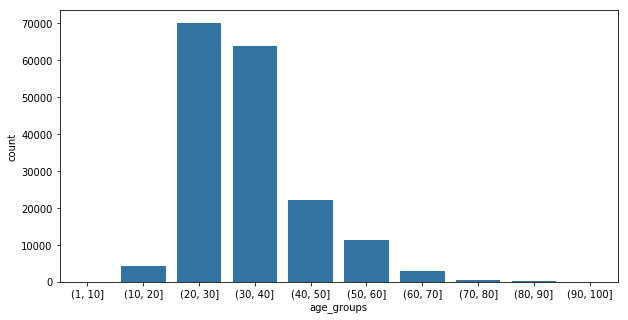

In [143]:
# creating an age_group column to see the distribution clearly and easily
gobike['age_groups'] = pd.cut(x=gobike['member_age'], bins=[1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]) 
plt.figure(figsize=[10, 5])
color = sb.color_palette()[0]
sb.countplot(data=gobike,x='age_groups',color=color);

The age group distribution indicates that most of the riders were in the 20 to 30 years of age group.

### Examining the distribution of start station id and end station id

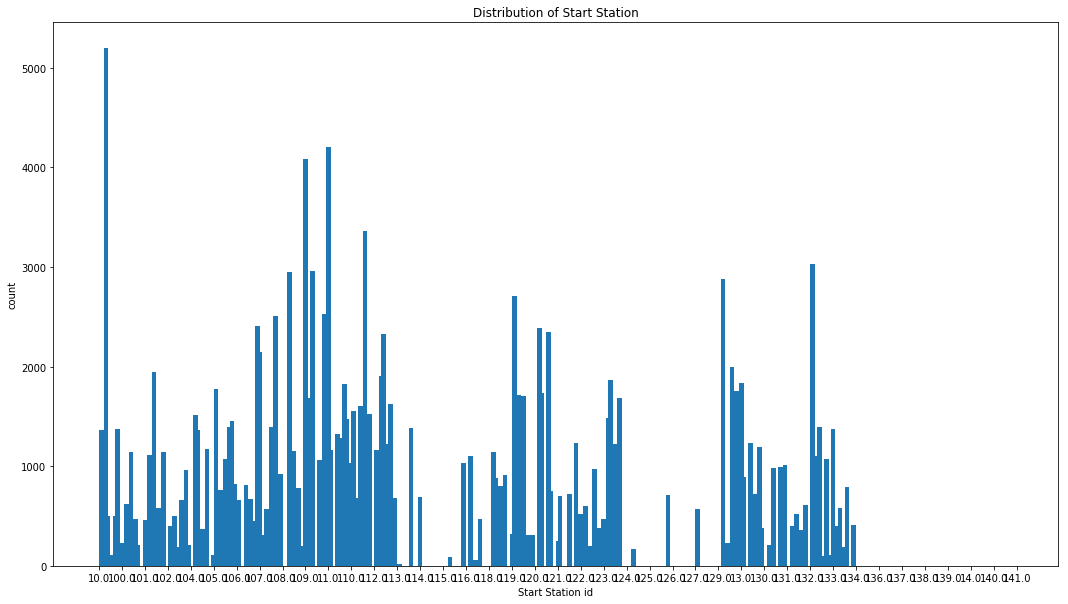

58.0     3649
67.0     3408
81.0     2952
21.0     2711
3.0      2620
30.0     2577
15.0     2541
22.0     2216
16.0     2191
5.0      2144
6.0      1975
239.0    1761
243.0    1712
50.0     1702
27.0     1678
66.0     1675
17.0     1646
93.0     1496
90.0     1479
44.0     1476
23.0     1420
245.0    1322
19.0     1311
104.0    1274
61.0     1257
182.0    1231
126.0    1226
114.0    1224
256.0    1176
350.0    1154
         ... 
209.0      54
217.0      54
361.0      53
46.0       53
297.0      49
358.0      48
283.0      47
318.0      37
362.0      36
228.0      35
287.0      32
288.0      32
290.0      31
298.0      30
378.0      28
307.0      27
359.0      25
229.0      23
226.0      19
303.0      19
225.0      17
388.0      17
398.0      16
389.0      13
234.0       9
301.0       9
51.0        7
224.0       4
300.0       3
344.0       2
Name: start_station_id, Length: 329, dtype: int64


In [144]:
# distrubtion of start station using the id's.
binsize = 2
bins = np.arange(0, gobike['start_station_id'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[18, 10])
plt.xticks(range(0, 401, 10))
plt.hist(data = gobike, x = 'start_station_id', bins = bins)
plt.title('Distribution of Start Station')
plt.xlabel('Start Station id')
plt.ylabel('count')
plt.show()
print(gobike['start_station_id'].value_counts())

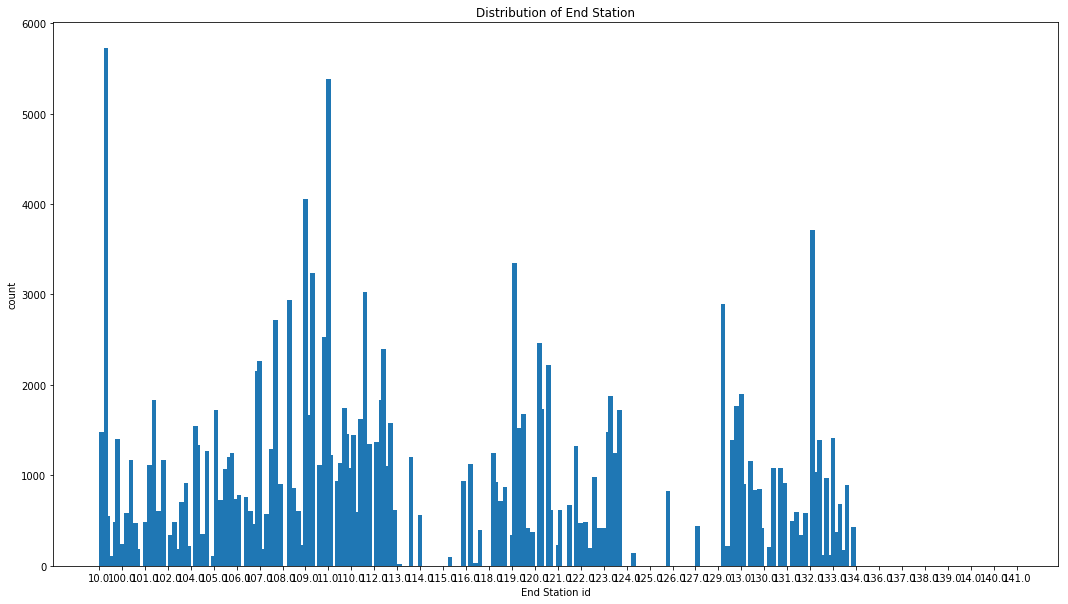

67.0     4624
58.0     3709
21.0     3461
15.0     3151
30.0     2870
3.0      2854
81.0     2782
6.0      2341
16.0     2264
5.0      2153
22.0     1970
27.0     1780
239.0    1780
44.0     1733
50.0     1667
66.0     1628
17.0     1622
93.0     1590
90.0     1440
23.0     1414
182.0    1392
19.0     1366
245.0    1321
114.0    1271
350.0    1270
36.0     1247
61.0     1216
126.0    1182
104.0    1135
24.0     1116
         ... 
358.0      50
191.0      48
217.0      48
362.0      46
297.0      45
292.0      45
318.0      42
299.0      38
307.0      37
222.0      35
287.0      34
290.0      33
303.0      30
298.0      28
378.0      25
288.0      24
359.0      20
229.0      20
225.0      19
226.0      19
388.0      18
228.0      16
398.0      12
389.0      11
234.0      10
51.0        9
300.0       7
344.0       6
224.0       5
301.0       5
Name: end_station_id, Length: 329, dtype: int64


In [145]:
# distrubtion of End station using the id's.
binsize = 2
bins = np.arange(0, gobike['end_station_id'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[18, 10])
plt.xticks(range(0, 401, 10))
plt.hist(data = gobike, x = 'end_station_id', bins = bins)
plt.title('Distribution of End Station')
plt.xlabel('End Station id')
plt.ylabel('count')
plt.show()
print(gobike['end_station_id'].value_counts())

Observing both distribution for start and end station they both have a similar distribution with most of the trips starting and ending at the stations with id67 and id58.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The duration_secs variable had a large range of values, I looked at the data first with the duration secs variable before converting the duration in seconds to minutes for better and clearer understanding and indication. viewing after the conversion from seconds to minutes it indicated that majority of the trips lasted between 5 and 13 minutes.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> In order to be able to get a clear distribution of the start time of the trips, the start date, start time and start day had to be extracted from the start time variable, and the age column had to be created by subtracting the year the data was taken from the member’s birth year to get the distribution of the ages.

## Bivariate Exploration

I will be looking at how each variable influence each other

### Examining the interaction between trip duration in minutes and gender

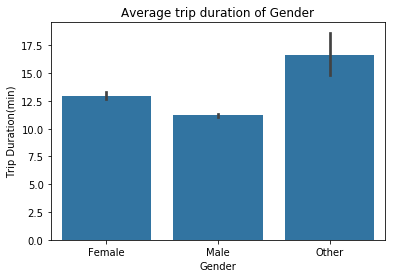

In [146]:
#plotting a barplot to examine the inetraction between gender and duration 
base_color = sb.color_palette()[0]
sb.barplot(data = gobike, x='member_gender',y='duration_min',color=base_color)
plt.xlabel('Gender')
plt.ylabel('Trip Duration(min)')
plt.title('Average trip duration of Gender')
plt.show()

The male riders started more rides than the other genders, but has the lowest average for the duration of trips (minute).

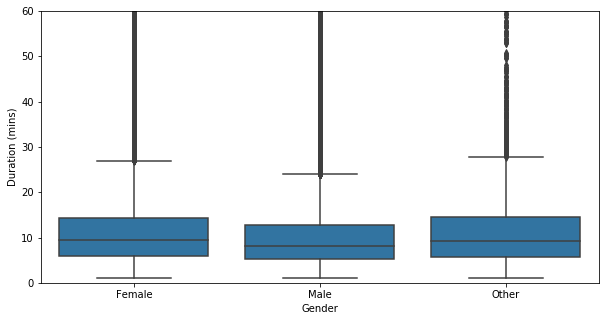

In [147]:
#plotting a box plot to examine duration in minutes and gender
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]
sb.boxplot(data = gobike, x = 'member_gender', y = 'duration_min', color = base_color)
plt.ylim([0, 60])
plt.xlabel('Gender')
plt.ylabel('Duration (mins)')
plt.show()

The box plot indicates that the difference shhown between each gender for duation of trip is not significant.

### What is the average trip duration for each user type

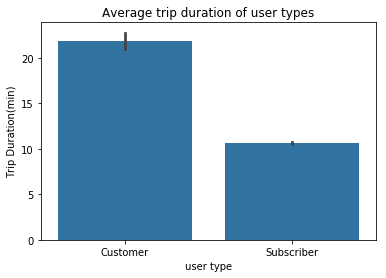

In [148]:
#plotting a barplot to examine the inetraction between gender and duration 
base_color = sb.color_palette()[0]
sb.barplot(data = gobike, x='user_type',y='duration_min',color=base_color)
plt.xlabel('user type')
plt.ylabel('Trip Duration(min)')
plt.title('Average trip duration of user types')

plt.show()

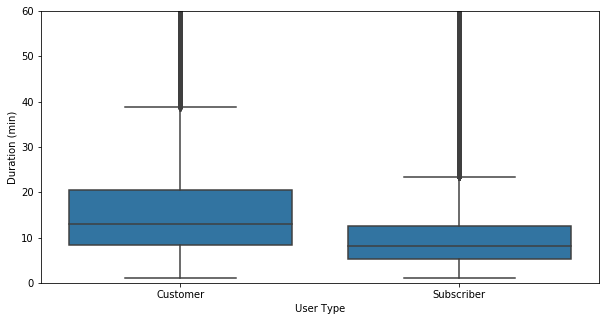

In [149]:
#plotting box plot
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]
sb.boxplot(data = gobike, x = 'user_type', y = 'duration_min', color = base_color)
plt.ylim([0, 60])
plt.xlabel('User Type')
plt.ylabel('Duration (min)');

The customer users have the highest average trip duration than the subscribers despite being less in numbers compared to the subscribers as shown by both plots.

### Which day of the week did bike trip take longer 

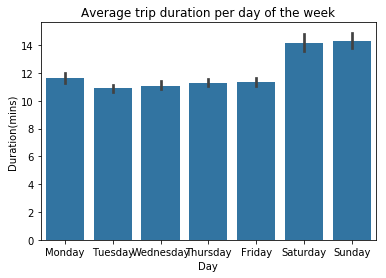

In [150]:
#ploting a bar plot of days against duration
base_color = sb.color_palette()[0]
sb.barplot(data = gobike, x='start_day_of_week',y='duration_min',color=base_color)
plt.xlabel('Day')
plt.ylabel('Duration(mins)')
plt.title('Average trip duration per day of the week')
plt.show()

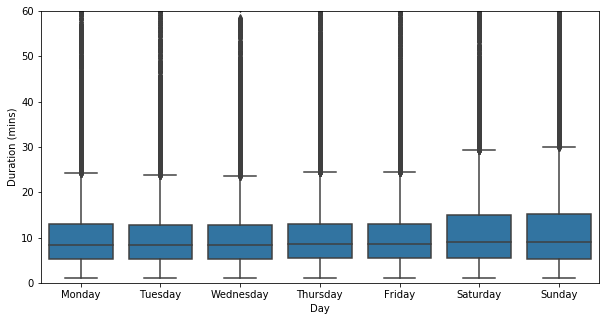

In [151]:
#plotting a box plot to examine correllation between duration in minutes and gender
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]
sb.boxplot(data = gobike, x = 'start_day_of_week', y = 'duration_min', color = base_color)
plt.ylim([0, 60])
plt.xlabel('Day')
plt.ylabel('Duration (mins)')
plt.show()

Even though more rides were taken during the weekdays, the average duration in minutes on the weekends is slightly higher during the week. The trips duration during weekdays are similar on each individual day and not much difference between the weekends either.

### What is the distribution of user type per week

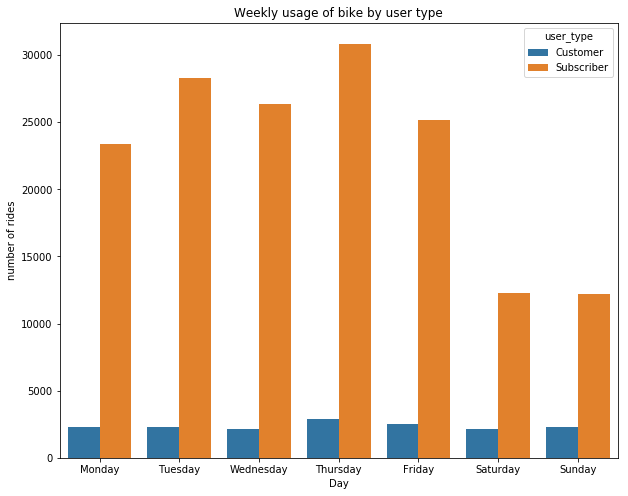

In [152]:
plt.figure(figsize=[10, 8])
sb.countplot(data=gobike, x='start_day_of_week', hue='user_type')
plt.xlabel('Day')
plt.ylabel('number of rides')
plt.title("Weekly usage of bike by user type")
plt.show()

The subscribers are way more in numbers than the customers, it can be noticed that a significant decrease on weekends of the numbers subscriber trips indicate that the subscribers have a primary reason for subscription which they use mostly on weekdays

### What is the distribution of genders per weekday

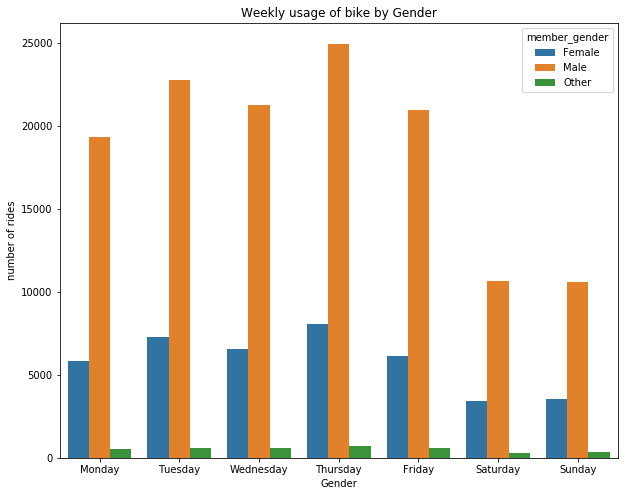

In [153]:
plt.figure(figsize=[10, 8])
sb.countplot(data=gobike, x='start_day_of_week', hue='member_gender')
plt.xlabel('Gender')
plt.ylabel('number of rides')
plt.title("Weekly usage of bike by Gender")
plt.show()

It appears that the genders are evenly distributed across the days of the week according to their respective counts.

### What is the relationship between genders and users

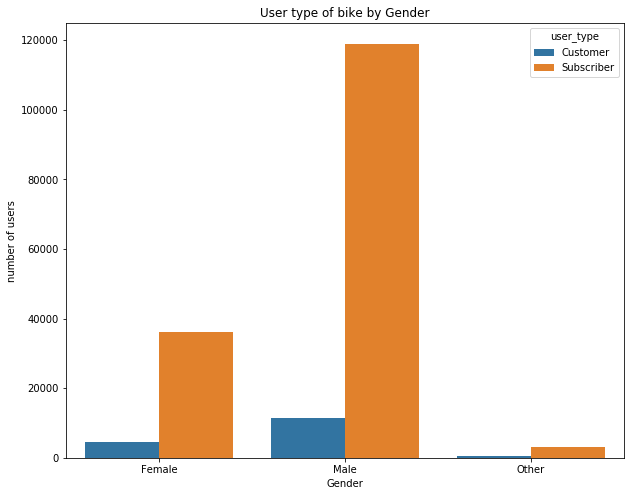

In [154]:
plt.figure(figsize=[10, 8])
sb.countplot(data=gobike, x='member_gender', hue='user_type')
plt.xlabel('Gender')
plt.ylabel('number of users')
plt.title("User type of bike by Gender")
plt.show()

 It also  appears that the genders are evenly distributed across the user type

### which gender shared their bike trip more

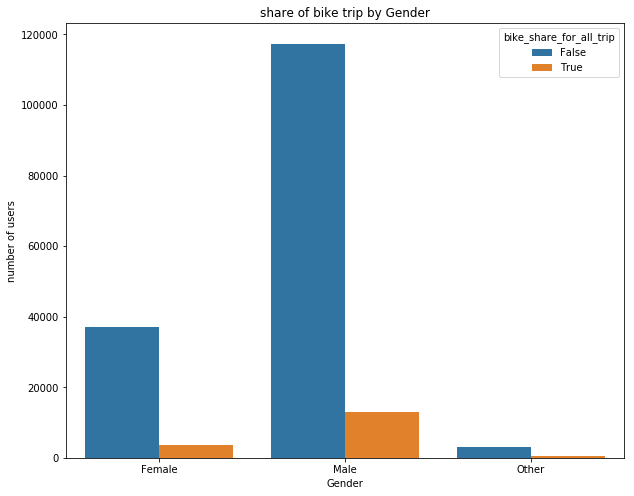

In [155]:
plt.figure(figsize=[10, 8])
sb.countplot(data=gobike, x='member_gender', hue='bike_share_for_all_trip')
plt.xlabel('Gender')
plt.ylabel('number of users')
plt.title("share of bike trip by Gender")
plt.show()

Most of the male and female riders did not share their trip during their rides.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Subscribing riders are way more than customers but has the lower average for duration of trip, also that the male users are more than the other genders but it was observed that while the male users take more trips, the other genders take a longer trip than male the male users.
Also the riding patterns of subscribers and customers varies, such that the subscribers use the bike system mostly on weekdays(Monday-Friday), indicating that it could be for the use of commuting to work, whereas the usage of costumers suggests that they primarily use the bike system for basic purposes as it’s usage is almost very similar during weekdays and weekends.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> A relationship was observed between the, Start station id and end station id indicating trips starting and ending at some station but didn't yield much to determine the trip durations. 


## Multivariate Exploration

>

### Looking at how gender and user type influence the duration of trip

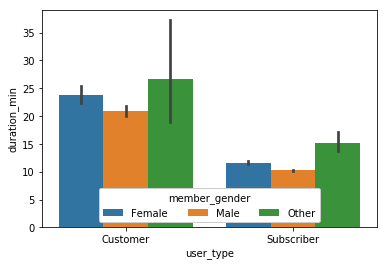

In [156]:
#Plotting a bar plot to examine the influence of gender nd user type on trip duration
ax = sb.barplot(data = gobike, x = 'user_type', y = 'duration_min', hue = 'member_gender')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'member_gender')

plt.show()

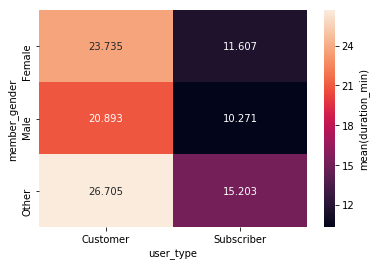

In [157]:
#using a heatmap to examine influence of gender nd user type on trip duration
cat_means = gobike.groupby(['user_type', 'member_gender']).mean()['duration_min']
cat_means = cat_means.reset_index(name = 'duration_min_avg')
cat_means = cat_means.pivot(index = 'member_gender', columns = 'user_type',
                            values = 'duration_min_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(duration_min)'})
plt.show()

The above heatmap indicates that the other and female customers embark on a longer bike trip than the male customers despite most of the customers being of the male gender, also the other and female subscriber embark on a longer bike trip than the male customers despite most of the subscribers being of the male gender.

### Looking at how day of the week and user type influence the duration of trip

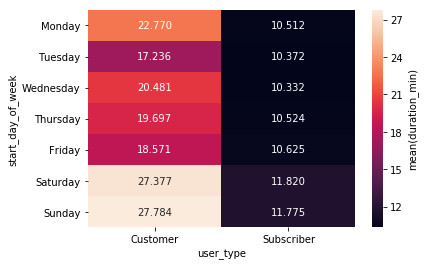

In [158]:
 #using a heatmap to examine influence of dayof the week nd user type on trip duration
cat_means = gobike.groupby(['user_type', 'start_day_of_week']).mean()['duration_min']
cat_means = cat_means.reset_index(name = 'duration_min_avg')
cat_means = cat_means.pivot(index = 'start_day_of_week', columns = 'user_type',
                            values = 'duration_min_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(duration_min)'})
plt.show()  


Subscribers take shorter trips compared to customers during each day of the week, as indicated on the heatmap. On Saturdays and Sundays, the trip durations increases significantly for both the customer and subscribing user, the customer type of user experienced the most significant increase. During the weekdays i.e Monday to friday, the average duration for trips of subscribers was stable compared that of the customer users. The longer trips were taken on Sunday by the customer users.

### Investigating how gender trip during the days of the week influence the duration of trip

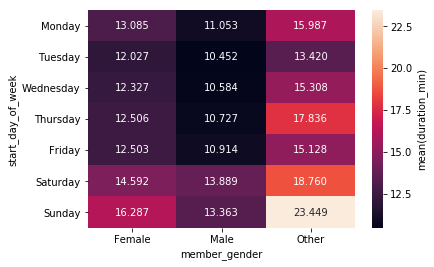

In [159]:
#using a heatmap to examine influence of gender nd day of the week on trip duration
cat_means = gobike.groupby(['member_gender', 'start_day_of_week']).mean()['duration_min']
cat_means = cat_means.reset_index(name = 'duration_min_avg')
cat_means = cat_means.pivot(index = 'start_day_of_week', columns = 'member_gender',
                            values = 'duration_min_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(duration_min)'})
plt.show()  

Male bike users take shorter trips compared to female and other gender during each day of the week, as indicated on the heatmap. On Saturdays and Sundays, the trip durations also increased significantly for all the genders, also a significant increase in the trip duration was experienced during the weekends for all genders. During the weekdays i.e Monday to Friday, the average duration for trips of the male and female seem stable compared that of the other gender.

### Looking at how the ages of user type influence the duration of trip

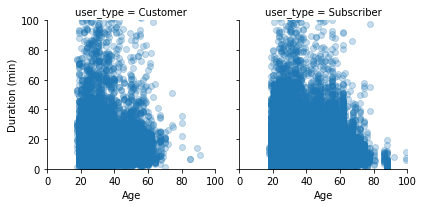

In [160]:
#Scatterplot for visualisation 
g= sb.FacetGrid(data = gobike, col = 'user_type', col_wrap = 2, xlim = [0, 100], ylim = [0, 100])
g.map(plt.scatter, 'member_age', 'duration_min', alpha=0.25)
g.set_xlabels('Age')
g.set_ylabels('Duration (min)');

From the scatter plot it can be seen that both the Customer and Subscribing users have the same trends for age and trip duration but the subscribing users having a wider range of age group indicating that age plays a role for a member to subscribe especially for older memebers.

### Looking at how the ages of each gender influence the duration of trip

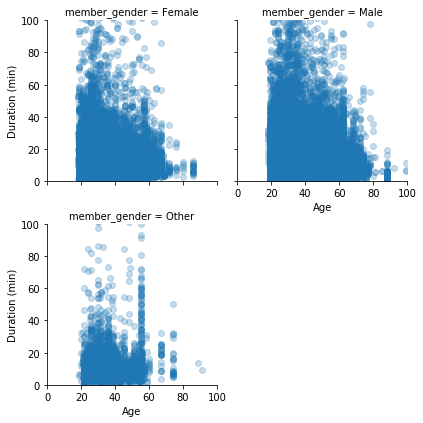

In [161]:
g= sb.FacetGrid(data = gobike, col = 'member_gender', col_wrap = 2, xlim = [0, 100], ylim = [0, 100])
g.map(plt.scatter, 'member_age', 'duration_min', alpha=0.25)
g.set_xlabels('Age')
g.set_ylabels('Duration (min)');

The male age group between 20 and 40 years of age took more longer trips than the female and other gender indicating that the age plays a factor on how long a rider travels.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In this part of investigation some of the trends and patterns observed in the previous bivariate and univariate investigations were further bolstered. Relationships between variables were plotted and visualized, information collected from each visualization were presented appropriately. The age group further strengthened that subscribers is age dependent especially for the older ager group, relationship between the gender and age group to determine duration for trip was also shown to be true that the youger age group take the longer trips.

### Were there any interesting or surprising interactions between features?

> The interactions between gender and duration of trip where the gender having a lower usage had the longer trip duration same for the user type and duration of trip, but the user type interaction with the duration of trip indicates that the subscribers uses the bike system for certain purposes.

## Conclusions
> The age of the riders influence how long a bike trip a rider takes irrespective of the gender and user type, also longer trips duration happens during the weekends by both type of users, this was carried out by first wrangling the data and cleaning the data, univariate analysis was carried out on each each variable before moving to bivariate eploration investigating 2 variables together and finally exploring the data multivarietly.

